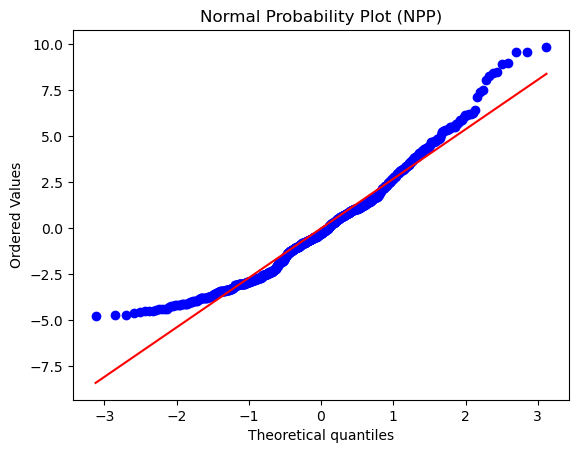

Equation:
AvgLapTimeSeconds = -2.534*Intercept + 0.969*FastestLapTimeSeconds + 0.014*FastestLapSpeed + 0.299*AvgPitDuration + -0.199*FastestPitstop + 0.064*Qualyfing1Seconds + 0.000*Qualyfing2Seconds + -0.001*Qualyfing3Seconds

R-squared: 0.956, Adjusted R-squared: 0.956

Durbin-Watson Score: 0.288

ANOVA Table:
                          df      sum_sq     mean_sq          F        PR(>F)
FastestLapTimeSeconds    1.0  124546.374  124546.374  16585.749  0.000000e+00
FastestLapSpeed          1.0      25.810      25.810      3.437  6.413470e-02
AvgPitDuration           1.0     193.460     193.460     25.763  4.856841e-07
FastestPitstop           1.0      67.172      67.172      8.945  2.871622e-03
Qualyfing1Seconds        1.0      99.249      99.249     13.217  2.960996e-04
Qualyfing2Seconds        1.0       0.506       0.506      0.067  7.951612e-01
Qualyfing3Seconds        1.0       1.422       1.422      0.189  6.635504e-01
Residual               761.0    5714.532       7.509        Na

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\FormulaOne\\Report 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds',
    'FastestLapTimeSeconds', 
    'FastestLapSpeed', 
    'AvgPitDuration', 
    'FastestPitstop', 
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ FastestLapTimeSeconds + FastestLapSpeed + AvgPitDuration + FastestPitstop + Qualyfing1Seconds + Qualyfing2Seconds + Qualyfing3Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds',
    'FastestLapTimeSeconds', 
    'FastestLapSpeed', 
    'AvgPitDuration', 
    'FastestPitstop', 
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


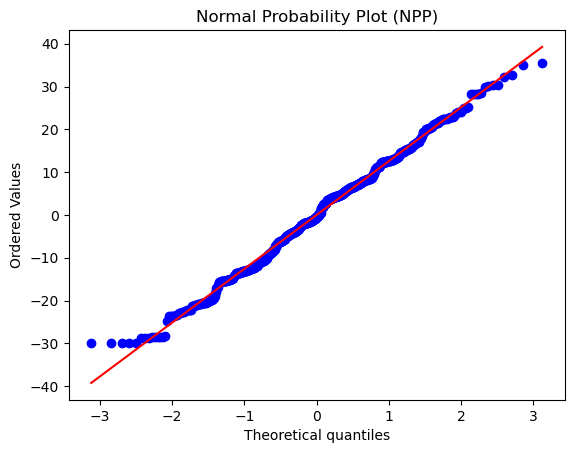

Equation:
AvgLapTimeSeconds = 100.015*Intercept + -0.059*FastestLapSpeed + 0.115*Qualyfing2Seconds + -0.023*Qualyfing3Seconds

R-squared: 0.071, Adjusted R-squared: 0.068

Durbin-Watson Score: 0.278

ANOVA Table:
                      df      sum_sq   mean_sq       F        PR(>F)
FastestLapSpeed      1.0    1171.623  1171.623   7.386  6.720695e-03
Qualyfing2Seconds    1.0    7597.465  7597.465  47.897  9.507161e-12
Qualyfing3Seconds    1.0     535.386   535.386   3.375  6.656912e-02
Residual           765.0  121344.053   158.620     NaN           NaN

Coefficients Table (with VIF):
            Variable  Coefficient  Standard Error  t-value         P>|t|  \
0          Intercept      100.015           5.549   18.023  8.591839e-61   
1    FastestLapSpeed       -0.059           0.025   -2.358  1.862629e-02   
2  Qualyfing2Seconds        0.115           0.017    6.853  1.490637e-11   
3  Qualyfing3Seconds       -0.023           0.013   -1.837  6.656912e-02   

     VIF  
0    NaN  
1  1.01

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds', 
    'FastestLapSpeed',
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ FastestLapSpeed + Qualyfing2Seconds + Qualyfing3Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds', 
    'FastestLapSpeed',
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)

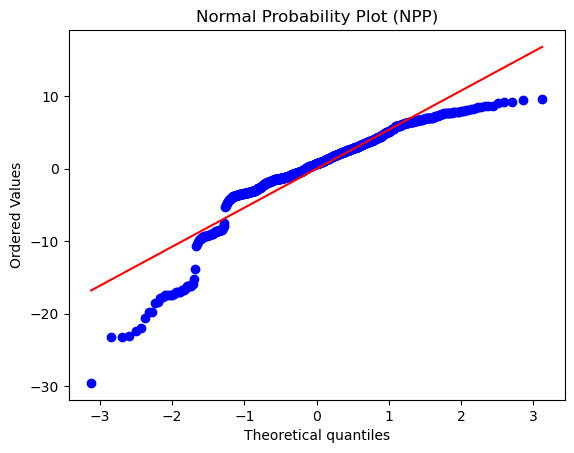

Equation:
AvgLapTimeSeconds = 9.550*Intercept + 0.021*FastestLapSpeed + 0.164*AvgPitDuration + 0.029*FastestPitstop + 0.858*Qualyfing1Seconds + 0.017*Qualyfing2Seconds + -0.004*Qualyfing3Seconds

R-squared: 0.807, Adjusted R-squared: 0.806

Durbin-Watson Score: 0.251

ANOVA Table:
                      df     sum_sq    mean_sq         F         PR(>F)
FastestLapSpeed      1.0   1171.623   1171.623    35.490   3.915369e-09
AvgPitDuration       1.0   5877.321   5877.321   178.030   1.195565e-36
FastestPitstop       1.0   5834.142   5834.142   176.722   2.038173e-36
Qualyfing1Seconds    1.0  92435.981  92435.981  2799.981  2.204239e-257
Qualyfing2Seconds    1.0    158.757    158.757     4.809   2.861430e-02
Qualyfing3Seconds    1.0     14.743     14.743     0.447   5.041612e-01
Residual           762.0  25155.959     33.013       NaN            NaN

Coefficients Table (with VIF):
            Variable  Coefficient  Standard Error  t-value          P>|t|  \
0          Intercept        9.550

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds', 
    'FastestLapSpeed', 
    'AvgPitDuration', 
    'FastestPitstop', 
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ FastestLapSpeed + AvgPitDuration + FastestPitstop + Qualyfing1Seconds + Qualyfing2Seconds + Qualyfing3Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds',
    'FastestLapSpeed', 
    'AvgPitDuration', 
    'FastestPitstop', 
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


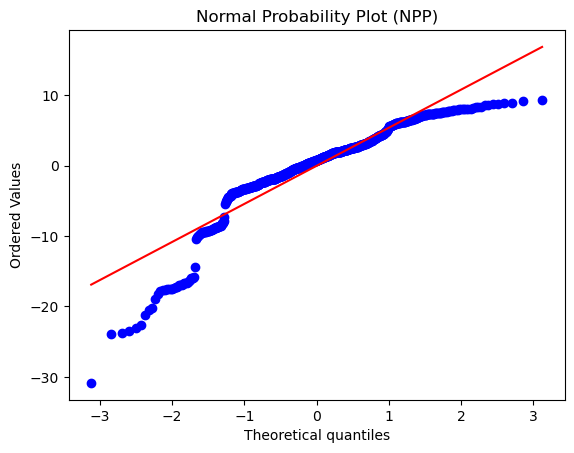

Equation:
AvgLapTimeSeconds = 13.766*Intercept + 0.019*FastestLapSpeed + 0.870*Qualyfing1Seconds + 0.016*Qualyfing2Seconds + -0.004*Qualyfing3Seconds

R-squared: 0.804, Adjusted R-squared: 0.803

Durbin-Watson Score: 0.255

ANOVA Table:
                      df      sum_sq     mean_sq         F         PR(>F)
FastestLapSpeed      1.0    1171.623    1171.623    34.904   5.214159e-09
Qualyfing1Seconds    1.0  103695.066  103695.066  3089.184  1.165831e-270
Qualyfing2Seconds    1.0     123.989     123.989     3.694   5.498834e-02
Qualyfing3Seconds    1.0      12.551      12.551     0.374   5.410560e-01
Residual           764.0   25645.297      33.567       NaN            NaN

Coefficients Table (with VIF):
            Variable  Coefficient  Standard Error  t-value          P>|t|  \
0          Intercept       13.766           3.021    4.557   6.047486e-06   
1    FastestLapSpeed        0.019           0.012    1.647   1.000089e-01   
2  Qualyfing1Seconds        0.870           0.016   53.3

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds', 
    'FastestLapSpeed',
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ FastestLapSpeed + Qualyfing1Seconds + Qualyfing2Seconds + Qualyfing3Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds',
    'FastestLapSpeed',
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)


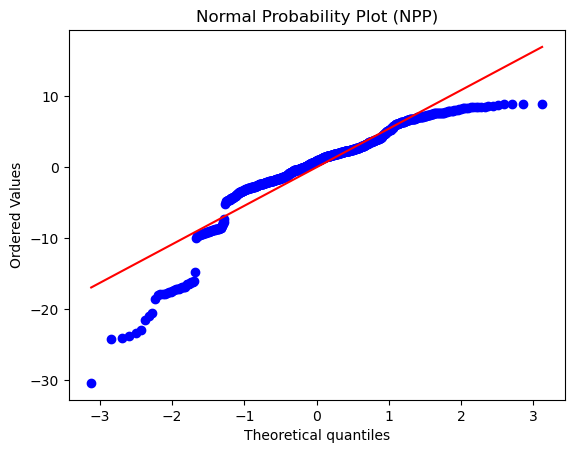

Equation:
AvgLapTimeSeconds = 18.182*Intercept + 0.867*Qualyfing1Seconds + 0.015*Qualyfing2Seconds + -0.004*Qualyfing3Seconds

R-squared: 0.803, Adjusted R-squared: 0.802

Durbin-Watson Score: 0.252

ANOVA Table:
                      df      sum_sq     mean_sq         F         PR(>F)
Qualyfing1Seconds    1.0  104778.774  104778.774  3114.499  6.329321e-272
Qualyfing2Seconds    1.0     118.281     118.281     3.516   6.116548e-02
Qualyfing3Seconds    1.0      15.141      15.141     0.450   5.025078e-01
Residual           765.0   25736.330      33.642       NaN            NaN

Coefficients Table (with VIF):
            Variable  Coefficient  Standard Error  t-value          P>|t|  \
0          Intercept       18.182           1.393   13.054   2.632416e-35   
1  Qualyfing1Seconds        0.867           0.016   53.555  5.072177e-261   
2  Qualyfing2Seconds        0.015           0.008    1.948   5.179848e-02   
3  Qualyfing3Seconds       -0.004           0.006   -0.671   5.025078e-01   


In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds',
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ Qualyfing1Seconds + Qualyfing2Seconds + Qualyfing3Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds',
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)

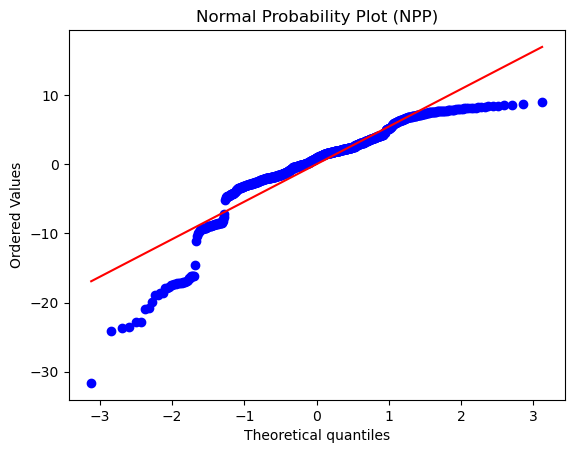

Equation:
AvgLapTimeSeconds = 18.415*Intercept + 0.875*Qualyfing1Seconds

R-squared: 0.802, Adjusted R-squared: 0.802

Durbin-Watson Score: 0.251

ANOVA Table:
                      df      sum_sq     mean_sq         F         PR(>F)
Qualyfing1Seconds    1.0  104778.774  104778.774  3106.536  6.122515e-272
Residual           767.0   25869.752      33.728       NaN            NaN

Coefficients Table (with VIF):
            Variable  Coefficient  Standard Error  t-value          P>|t|  \
0          Intercept       18.415           1.382   13.321   1.435775e-36   
1  Qualyfing1Seconds        0.875           0.016   55.736  6.122515e-272   

    VIF  
0   NaN  
1  5.05  


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Select only quantitative columns
quantitative_cols = [
    'AvgLapTimeSeconds', 
    'Qualyfing1Seconds'
]
df_quant = df[quantitative_cols].dropna()  # Drop rows with missing values

# Create a formula for the regression model
formula = 'AvgLapTimeSeconds ~ Qualyfing1Seconds'

# Fit the regression model using the formula
model = smf.ols(formula=formula, data=df_quant).fit()

# Calculate VIF scores
X_vif = df_quant[[
    'AvgLapTimeSeconds',
    'Qualyfing1Seconds'
]]
X_vif = sm.add_constant(X_vif)  # Add constant for intercept
vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

# Outputs
# 1. Equation
coefficients = model.params
equation = "AvgLapTimeSeconds = " + " + ".join([f"{coefficients[name]:.3f}*{name}" for name in coefficients.index])

# 2. R-squared and Adjusted R-squared
r2 = model.rsquared
adj_r2 = model.rsquared_adj

# 3. Durbin-Watson Score
dw_score = sm.stats.durbin_watson(model.resid)

# 4. ANOVA Table
anova_results = sm.stats.anova_lm(model, typ=1)
anova_results_rounded = anova_results.copy()
anova_results_rounded.iloc[:, :-1] = anova_results.iloc[:, :-1].round(3)

# 5. Coefficients Table (with VIF)
coeff_table = pd.DataFrame({
    "Coefficient": model.params.round(3),
    "Standard Error": model.bse.round(3),
    "t-value": model.tvalues.round(3),
    "P>|t|": model.pvalues  # Keep p-values unformatted
})
coeff_table = coeff_table.reset_index().rename(columns={"index": "Variable"})
coeff_table = pd.merge(coeff_table, vif_data, on="Variable", how="left")
coeff_table["VIF"] = coeff_table["VIF"].round(3)

# Save tables to Excel
anova_results_rounded.to_excel("anova_results.xlsx", index=True)
coeff_table.to_excel("coefficients_with_vif.xlsx", index=False)

# 6. Normal Probability Plot (NPP)
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot (NPP)')
plt.show()

# Print Outputs
print(f"Equation:\n{equation}")
print(f"\nR-squared: {r2:.3f}, Adjusted R-squared: {adj_r2:.3f}")
print(f"\nDurbin-Watson Score: {dw_score:.3f}")
print("\nANOVA Table:")
print(anova_results_rounded)
print("\nCoefficients Table (with VIF):")
print(coeff_table)

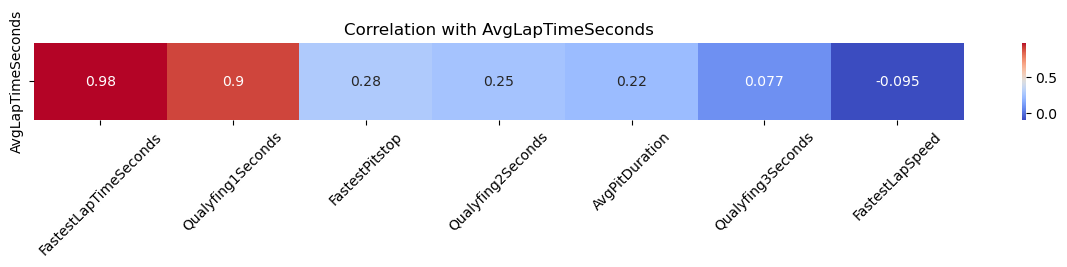

<Figure size 640x480 with 0 Axes>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\MSc\\MSc DAPM 38157\\Assignment 2\\CSVDatasetModified.csv')

# Specify the target variable
target_variable = 'AvgLapTimeSeconds'  # Replace with your target variable name

# List of columns to compare to the target variable (excluding the target variable)
selected_columns = ['FastestLapTimeSeconds', 
    'FastestLapSpeed', 
    'AvgPitDuration', 
    'FastestPitstop', 
    'Qualyfing1Seconds', 
    'Qualyfing2Seconds', 
    'Qualyfing3Seconds']  # Replace with your selected column names

# Calculate correlation of the selected columns with the target variable
correlation = data[selected_columns].corrwith(data[target_variable])

# Create a DataFrame with correlation values
correlation_df = correlation.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(15, 1))  # Adjust the size if needed
sns.heatmap(correlation_df.values.reshape(1, -1), annot=True, cmap='coolwarm', xticklabels=correlation_df.index, yticklabels=[target_variable])
# Rotate x-axis labels to show horizontally
plt.xticks(rotation=45)  # Set rotation to 0 for horizontal labels

plt.title(f'Correlation with {target_variable}')
plt.show()

# Save the heatmap as an image
plt.savefig('Regressioncorrelation_heatmap.png', format="png", bbox_inches='tight')  # Save image to the current directory

# Optionally, display the plot
# plt.show()